In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

df = pd.read_csv('vinotinto_calidad.csv')
df.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
print(df.groupby('calidad').size())

calidad
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


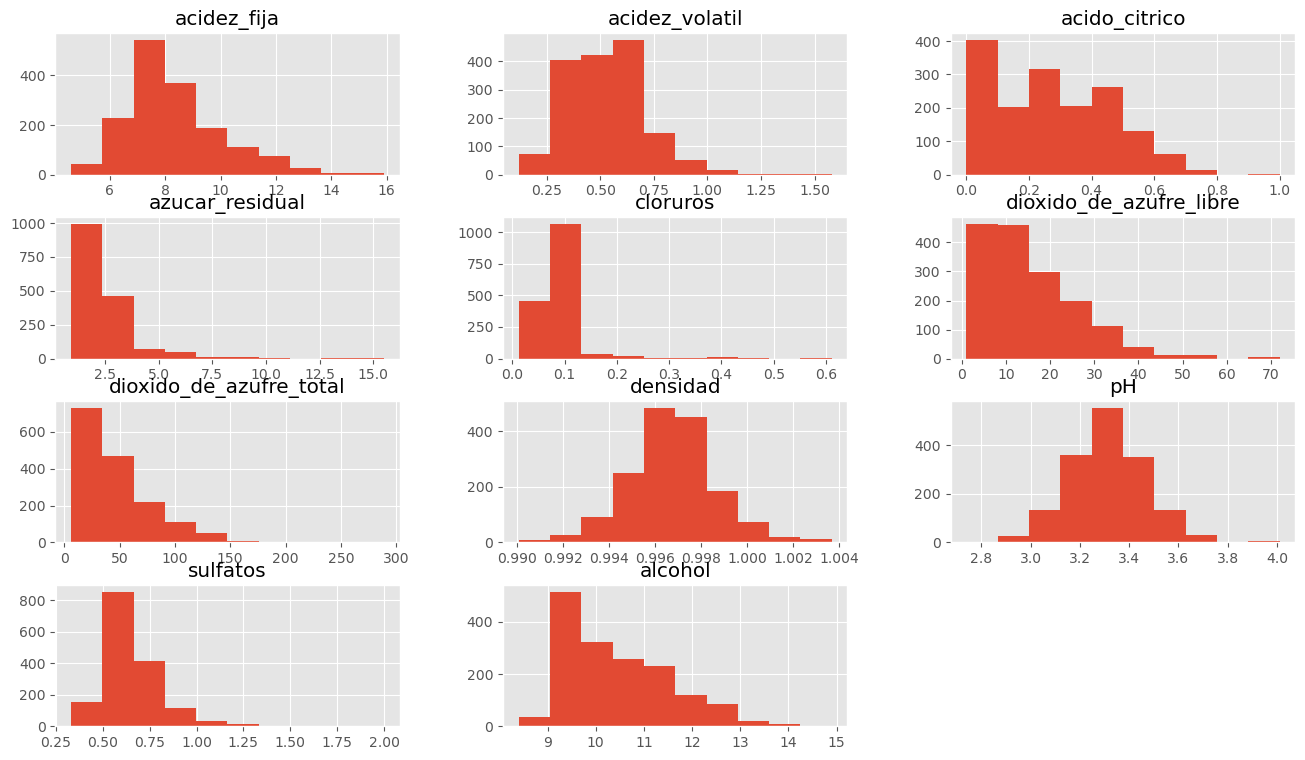

In [9]:
df.drop(['calidad'],axis=1).hist()
plt.show()

/home/migzam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


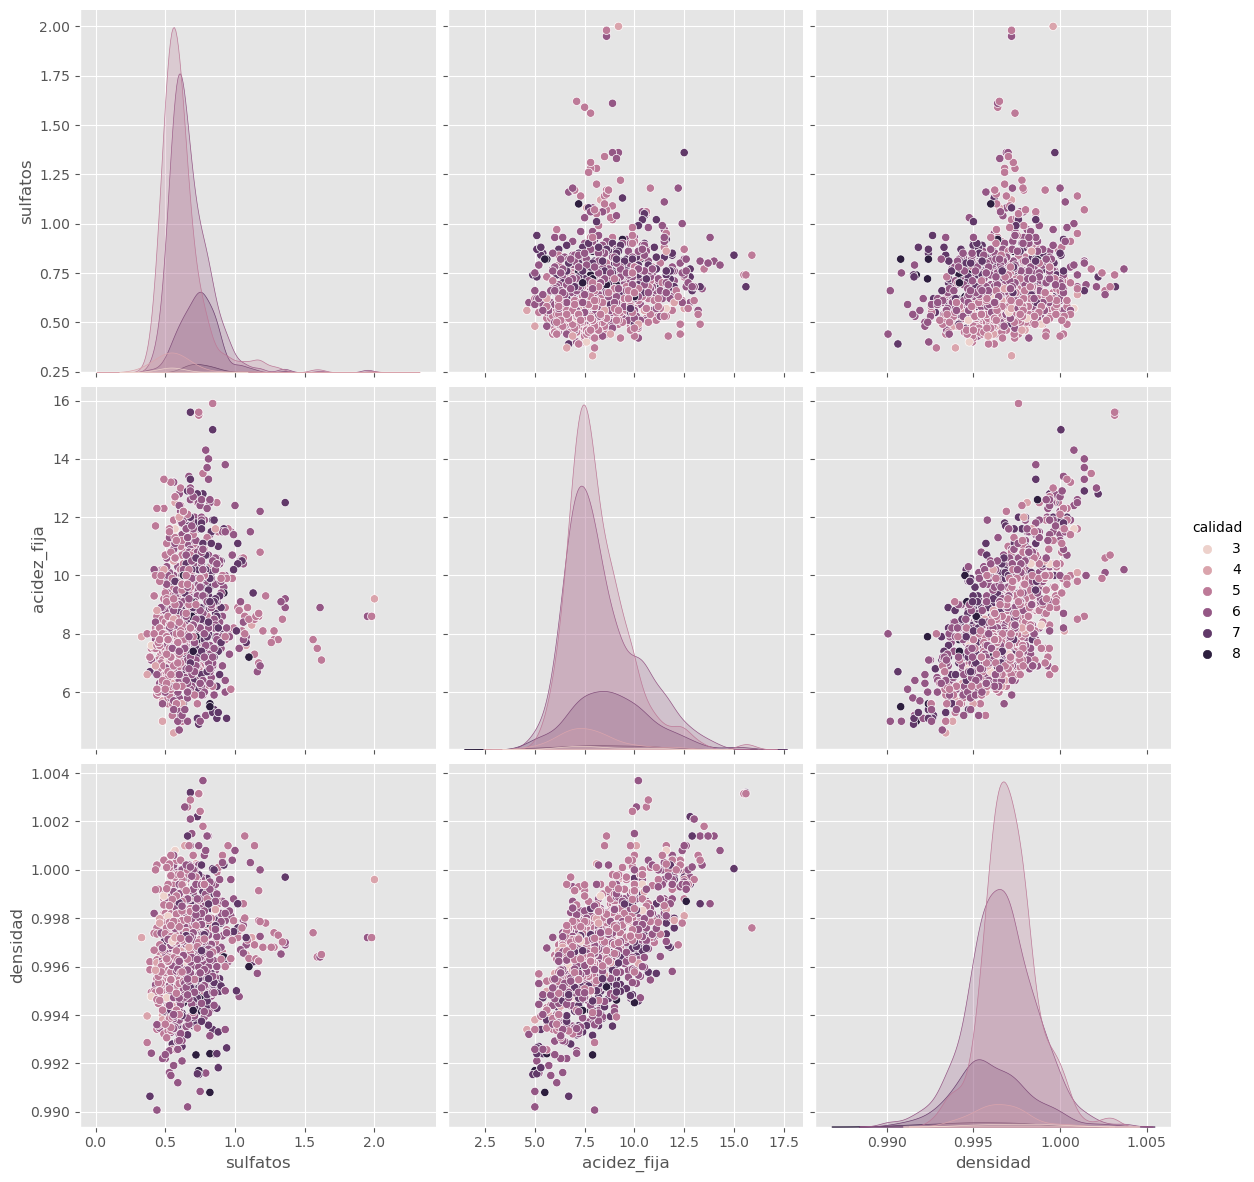

In [10]:
sb.pairplot(df.dropna(), hue='calidad',size=4, vars=["sulfatos","acidez_fija","densidad"], kind='scatter')

In [12]:
X = np.array(df[["sulfatos", "acidez_fija","densidad"]]) 
y = np.array(df['calidad'])
X.shape

(1599, 3)

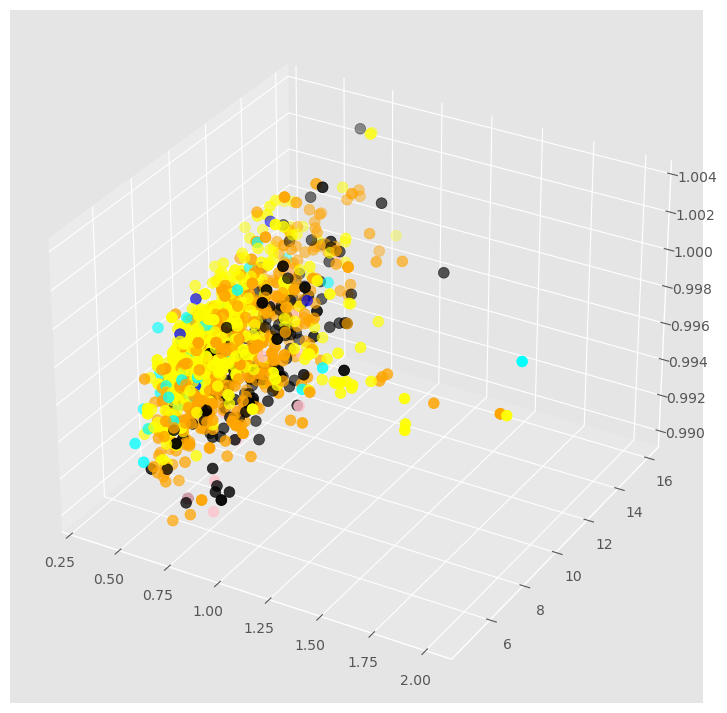

In [22]:

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
colores= ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', "brown", "purple"] 
asignar= []
for row in y:
	asignar.append(colores[row])
ax.scatter(X[:, 0], X[:,1], X[:, 2], c=asignar,s=60)

/home/migzam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/migzam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/migzam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/migzam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

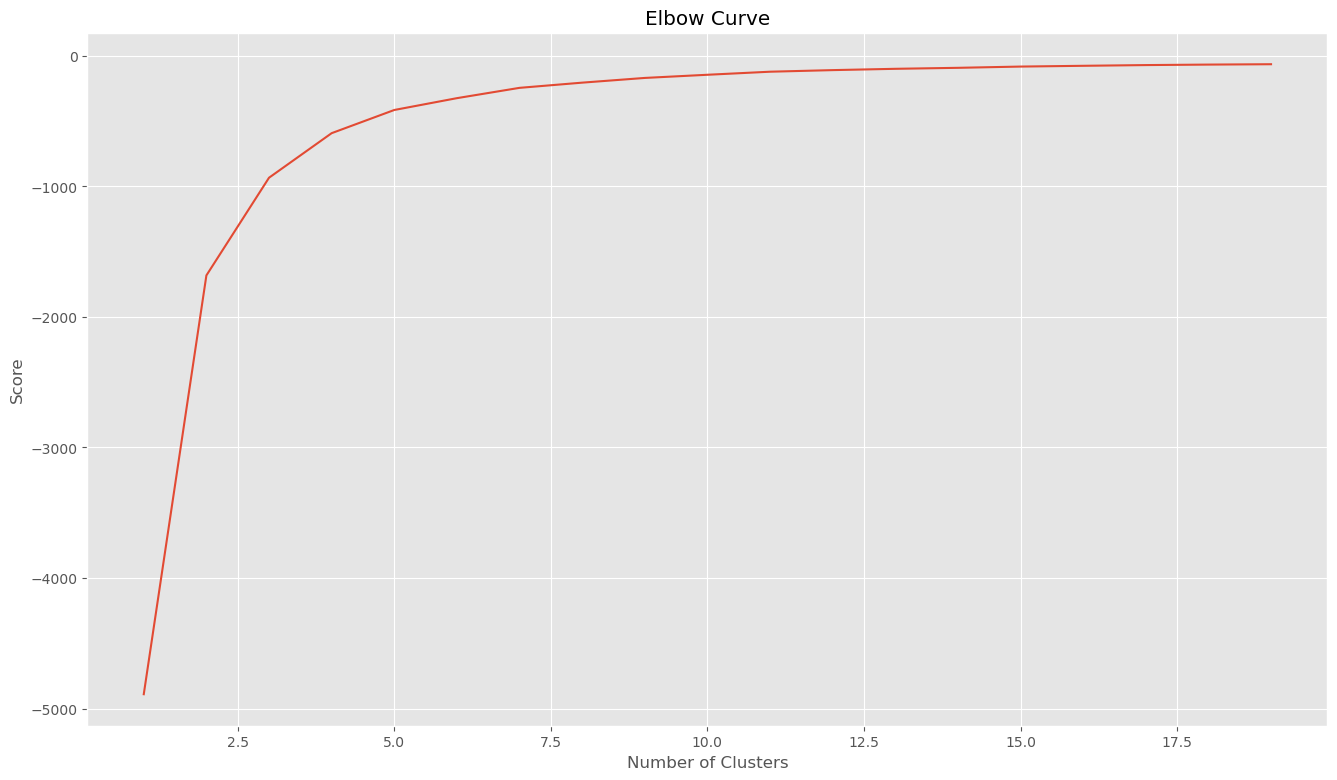

In [29]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [30]:
kmeans = KMeans(n_clusters=5).fit(X) 
centroids = kmeans.cluster_centers_ 
print(centroids)

[[ 0.62857664  6.27189781  0.99496496]
 [ 0.69050847 10.21144068  0.99809148]
 [ 0.71958678 12.36033058  0.99952066]
 [ 0.62484589  7.43869863  0.99627719]
 [ 0.69065104  8.68463542  0.99703143]]


/home/migzam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: Unrecognized marker style '-'

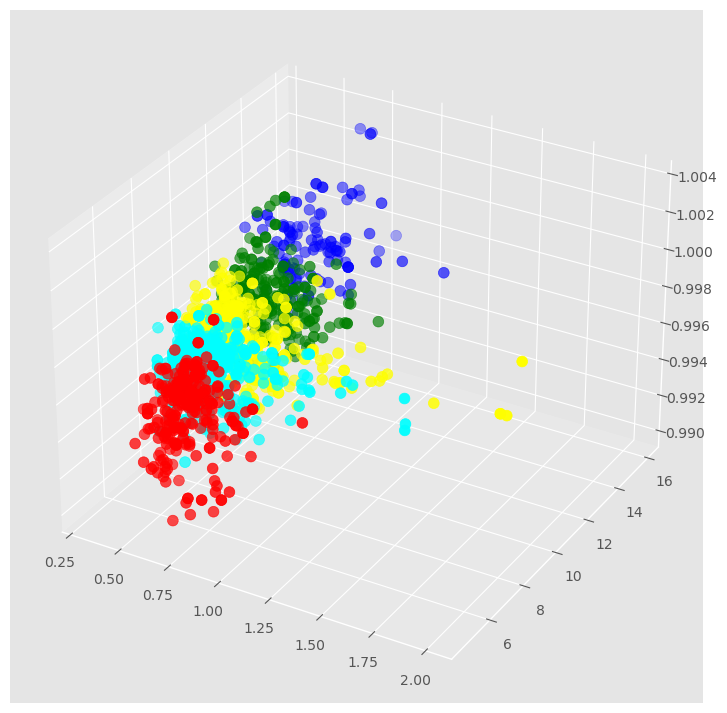

In [33]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green', 'blue', 'cyan', 'yellow']
asignar=[]
for row in labels:
	asignar.append(colores[row])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='-', c=colores, s=1000)

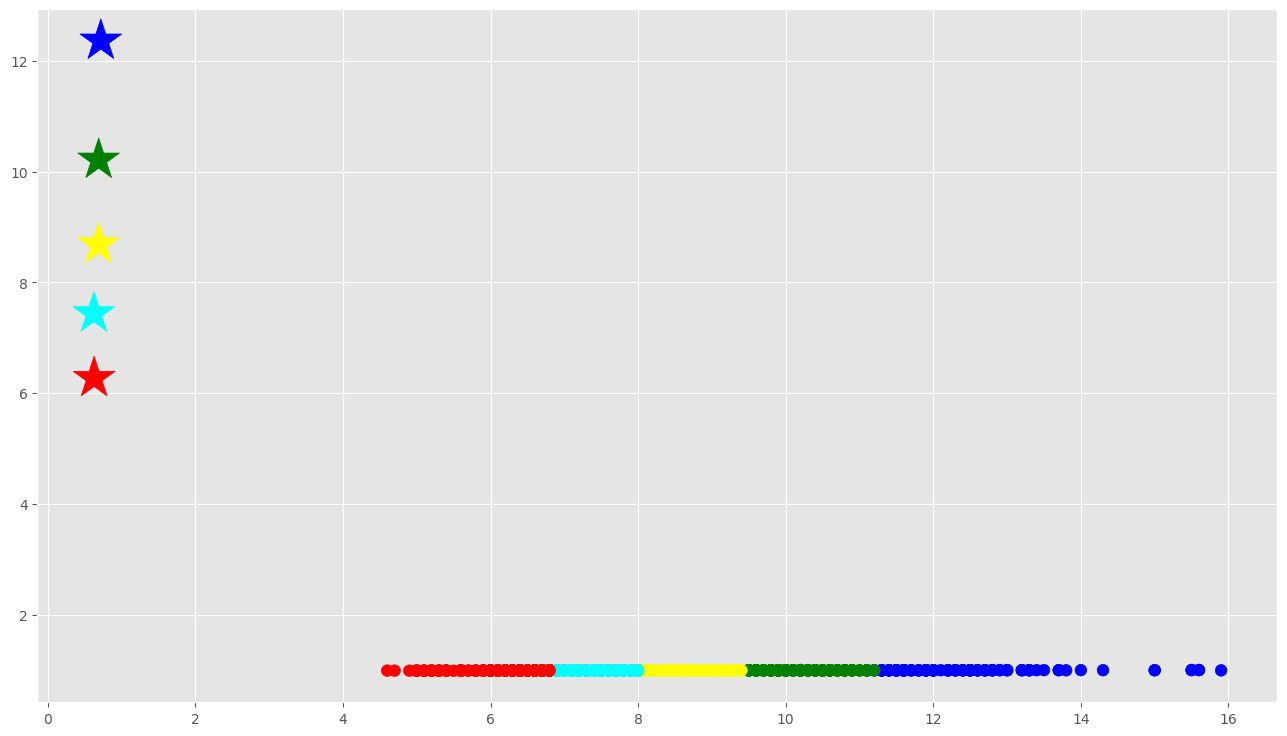

In [36]:
f1=df['acidez_fija'].values
f2= df['densidad'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

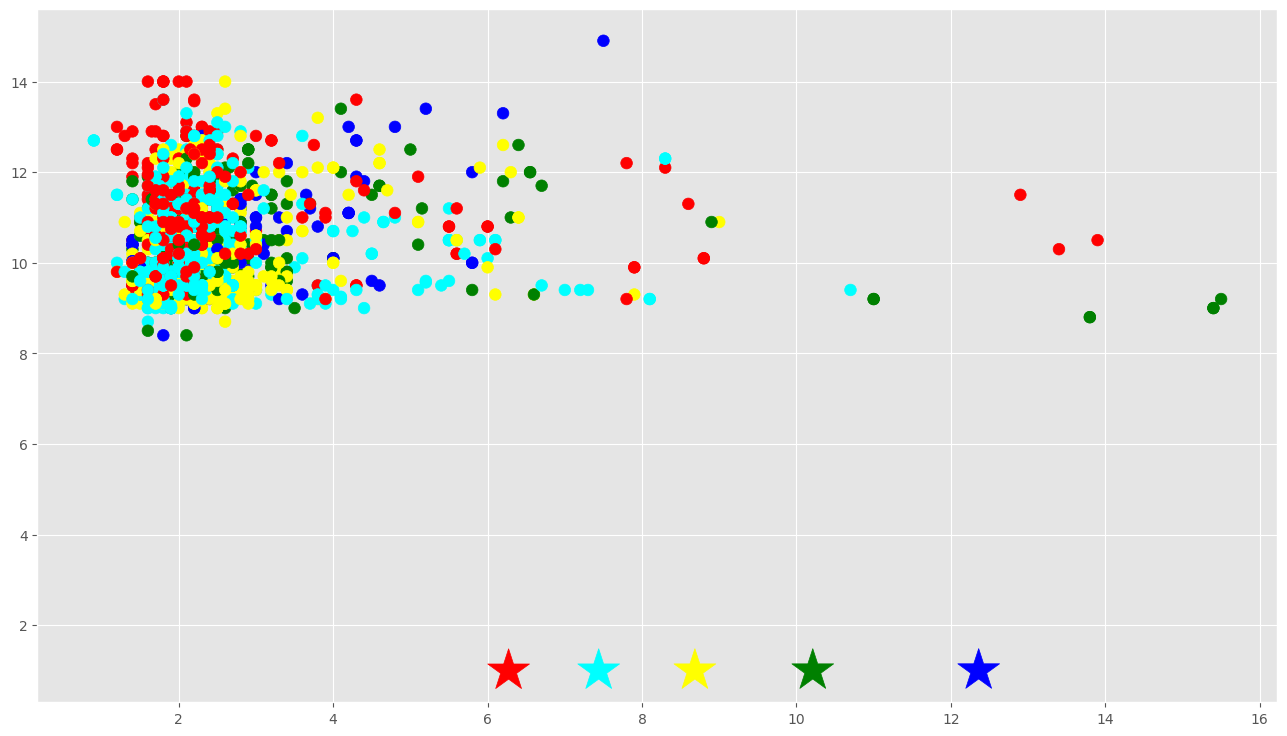

In [38]:
f1=df['azucar_residual'].values
f2=df['alcohol'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter (C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [40]:
copy=pd.DataFrame()
copy['acidez_fija']=df['acidez_fija'].values
copy['calidad']=df['calidad'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,274
1,green,236
2,blue,121
3,cyan,584
4,yellow,384


In [42]:
group_referrer_index = copy['label']  == 0
group_referrals = copy[group_referrer_index]
diversidadGrupo = pd.DataFrame()
diversidadGrupo['calidad'] = [0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('calidad').size()
diversidadGrupo

,calidad,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,2.0
4,4,15.0
5,5,106.0
6,6,119.0
7,7,29.0
8,8,3.0
9,9,NaN


In [45]:
for index, row in group_referrals.iterrows():
	if row["calidad"] == 2:
		print (row["acidez_fija"], row["calidad"], row["label"])

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X) 
closest

array([1127,  953,  548, 1430,  648])

In [47]:
tpvino=df['acidez_fija'].values
for row in closest:
	print(tpvino[row])

6.3
10.2
12.4
7.4
8.7


In [50]:
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["acidez_fija"], row["calidad"], row["label"])

6.7 5.0 0.0
5.6 5.0 0.0
6.3 5.0 0.0
6.7 5.0 0.0
5.2 5.0 0.0
5.7 4.0 0.0
6.8 5.0 0.0
4.6 4.0 0.0
6.4 5.0 0.0
5.6 5.0 0.0
6.6 6.0 0.0
6.6 6.0 0.0
6.6 5.0 0.0
6.8 6.0 0.0
6.7 5.0 0.0
6.2 5.0 0.0
6.3 6.0 0.0
5.0 4.0 0.0
4.7 6.0 0.0
6.8 5.0 0.0
6.2 5.0 0.0
6.1 5.0 0.0
5.6 5.0 0.0
5.6 5.0 0.0
6.6 6.0 0.0
5.2 6.0 0.0
6.3 5.0 0.0
5.2 6.0 0.0
5.8 5.0 0.0
6.8 6.0 0.0
6.8 5.0 0.0
6.8 6.0 0.0
6.8 5.0 0.0
6.7 6.0 0.0
6.4 6.0 0.0
6.8 5.0 0.0
5.4 7.0 0.0
6.8 5.0 0.0
6.8 5.0 0.0
5.2 7.0 0.0
6.6 5.0 0.0
6.6 7.0 0.0
6.1 6.0 0.0
6.7 6.0 0.0
5.6 8.0 0.0
6.6 5.0 0.0
6.6 5.0 0.0
6.8 5.0 0.0
6.6 7.0 0.0
6.6 7.0 0.0
6.4 6.0 0.0
5.3 7.0 0.0
6.8 6.0 0.0
6.5 6.0 0.0
6.8 6.0 0.0
5.0 5.0 0.0
6.2 6.0 0.0
6.2 6.0 0.0
5.0 8.0 0.0
6.6 6.0 0.0
6.3 6.0 0.0
6.8 5.0 0.0
6.8 5.0 0.0
6.7 6.0 0.0
5.1 6.0 0.0
6.4 5.0 0.0
6.4 5.0 0.0
6.4 6.0 0.0
6.5 5.0 0.0
6.3 6.0 0.0
6.5 5.0 0.0
6.5 5.0 0.0
5.1 7.0 0.0
4.9 7.0 0.0
6.7 5.0 0.0
6.7 5.0 0.0
5.9 6.0 0.0
5.9 6.0 0.0
6.7 7.0 0.0
6.7 7.0 0.0
6.0 5.0 0.0
6.6 5.0 0.0
6.4 5.0 0.0
6.4 

In [53]:
X_new = np.array([[0.48,11.5,0.8546]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
